# Load packages and data

In [1]:
# Loading the required packages to run this notebook
import src.utils.plotting as plotting
from src.visualisation.VisualiseTrajectories import VisualiseTrajectories
from src.Config import Config, ROISCOGConfig
import matplotlib.pyplot as plt, matplotlib.style as style, matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pathlib import Path
import progressbar
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

# Use seaborn style defaults and set the default figure size
sns.set(rc={"figure.figsize": fig_size})
sns.set_theme(style="whitegrid")
sns.set_context("paper") # One of paper, notebook, talk, and poster
style.use('seaborn-colorblind')

# Setup the correct foldure structure
project_dir = Path().resolve().parents[1]
processed_data_dir = project_dir / "data" / "processed"

# Define the regions to look into
region = "Skagen" # "Denmark" "Bornholm"
zoom = 8

In [2]:
fig_size = (10, 10)
visualise_trajectories = VisualiseTrajectories(region, save_figures=True, plot_figures=True, fig_size=fig_size, zoom=zoom)
lon_min, lon_max, lat_min, lat_max = visualise_trajectories.bounds

# Load the static Google Map image for the RIO
img = visualise_trajectories.read_static_map()

In [3]:
file_name = "RegionSkagen_01042019_31032020_Fish_600_2678400_60"
data_file = processed_data_dir / ("data_" + file_name + ".pkl")
data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")

# Read the info file to know how to read the data file
with open(data_info_file, "rb") as f:
    data_info = pickle.load(f)
data_info["indicies"][:10]

[0, 34855, 42987, 46159, 55407, 71538, 77872, 84144, 96926, 103384]

In [4]:
# Get the requested track - Read the data file from the current index
def get_track_by_index(path, idx, keep_cols=None, col_names=None):
    with open(path, "rb") as f:
        f.seek(idx)
        track = pickle.load(f)
    df = pd.DataFrame(track)
    
    if keep_cols is not None:
        df = df[keep_cols]
    if col_names is not None:
        df.columns = col_names
    return df

index = 1017196
df_lon_lat = get_track_by_index(data_file, index, keep_cols=["lon", "lat"], col_names=["Longitude", "Latitude"])
print(np.shape(df_lon_lat))
df_lon_lat = visualise_trajectories.remove_points_outside_ROI(df_lon_lat)
print(np.shape(df_lon_lat))

(13424, 2)
(13424, 2)


# Visualise single trajectories geographically 

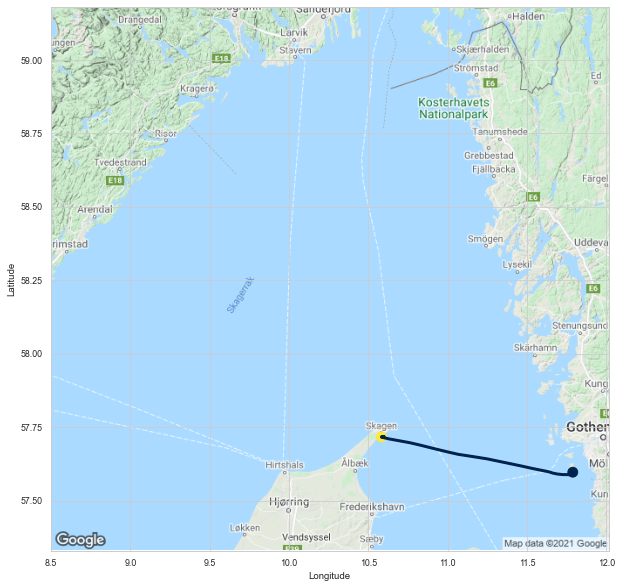

In [5]:
# Plot a single complete vessel trajectory on the static map
visualise_trajectories.read_map_plot_single_track(df_lon_lat)

100% (13423 of 13423) |##################| Elapsed Time: 0:03:19 Time:  0:03:19


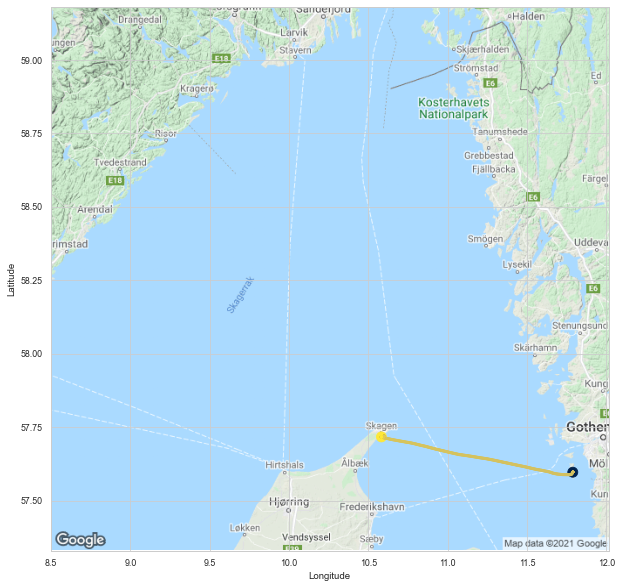

In [6]:
# Plot a single complete vessel trajectory on the static map
visualise_trajectories.read_map_plot_single_track(df_lon_lat, use_cmap=True)

# Visualise multiple trajectories geographically 

100% (127 of 127) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (47 of 47) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (145 of 145) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (256 of 256) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (98 of 98) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (97 of 97) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (202 of 202) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (100 of 100) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (135 of 135) |######################| Elapsed Time: 0:00:01 Time:  0:00:01
100% (123 of 123) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (60 of 60) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (54 of 54) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (64 of 64) |#######################

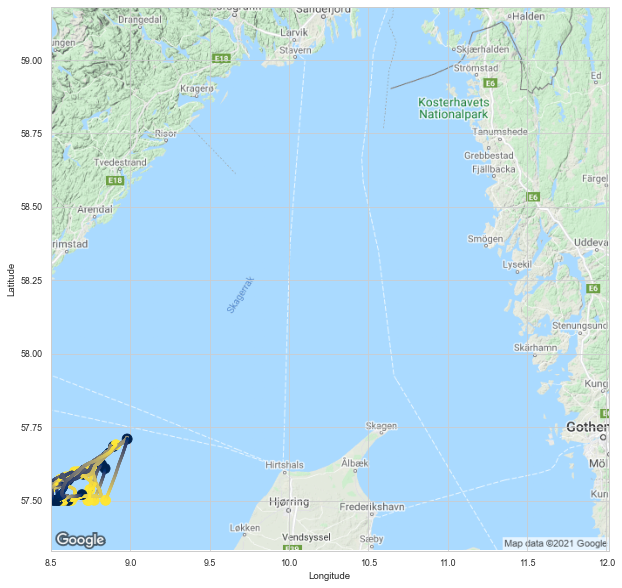

In [7]:
# Stop plotting and saving after each trajectory
visualise_trajectories.save_figures = False
visualise_trajectories.plot_figures = False
ax = visualise_trajectories.visualise_static_map(img)

# Take a look at some indicies for the same MMSI (211243240)
# print(data_info["indicies"][:22])
trajectories = []
for idx in data_info["indicies"][1:21]:
    df = get_track_by_index(data_file, idx)
    trajectories.append([df["mmsi"][0], df["track_length"][0], df["timestamp"][0], df["timestamp"].iloc[-1]])
    df_lon_lat =  get_track_by_index(data_file, idx, keep_cols=["lon", "lat"], col_names=["Longitude", "Latitude"])    
    visualise_trajectories.plot_single_track(df_lon_lat, ax, use_cmap=True)

# Plot the last trajectory and save the results
visualise_trajectories.save_figures = True
visualise_trajectories.plot_figures = True
df = get_track_by_index(data_file, data_info["indicies"][21])
trajectories.append([df["mmsi"][0], df["track_length"][0], df["timestamp"][0], df["timestamp"].iloc[-1]])
df_lon_lat =  get_track_by_index(data_file, data_info["indicies"][21], keep_cols=["lon", "lat"],
                                 col_names=["Longitude", "Latitude"])    
visualise_trajectories.plot_single_track(df_lon_lat, ax, use_cmap=True)

In [8]:
df = pd.DataFrame(trajectories, columns=["MMSI", "TrackLength" , "DateTimeStart", "DateTimeEnd"])
df = df.sort_values("DateTimeStart")
df["NextDateTimeStart"] = df["DateTimeStart"].shift(-1)
df

,MMSI,TrackLength,DateTimeStart,DateTimeEnd,NextDateTimeStart
0,211243240,128,1970-08-18 08:37:49,1970-08-18 10:44:49,1970-08-18 18:29:50
1,211243240,48,1970-08-18 18:29:50,1970-08-18 19:16:50,1970-08-18 20:17:09
2,211243240,146,1970-08-18 20:17:09,1970-08-18 22:42:09,1970-08-18 23:16:38
3,211243240,257,1970-08-18 23:16:38,1970-08-19 03:32:38,1970-08-19 04:48:38
4,211243240,99,1970-08-19 04:48:38,1970-08-19 06:26:38,1970-08-20 09:53:30
5,211243240,98,1970-08-20 09:53:30,1970-08-20 11:30:30,1970-08-20 21:20:18
6,211243240,203,1970-08-20 21:20:18,1970-08-21 00:42:18,1970-08-21 11:06:18
7,211243240,101,1970-08-21 11:06:18,1970-08-21 12:46:18,1970-08-21 14:04:18
8,211243240,136,1970-08-21 14:04:18,1970-08-21 16:19:18,1970-08-22 01:31:29
9,211243240,124,1970-08-22 01:31:29,1970-08-22 03:34:29,1970-08-22 08:10:52


100% (441 of 441) |######################| Elapsed Time: 0:00:02 Time:  0:00:02
100% (28 of 28) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (981 of 981) |######################| Elapsed Time: 0:00:07 Time:  0:00:07
100% (603 of 603) |######################| Elapsed Time: 0:00:05 Time:  0:00:05
100% (2025 of 2025) |####################| Elapsed Time: 0:00:20 Time:  0:00:20
100% (13423 of 13423) |##################| Elapsed Time: 0:04:31 Time:  0:04:31


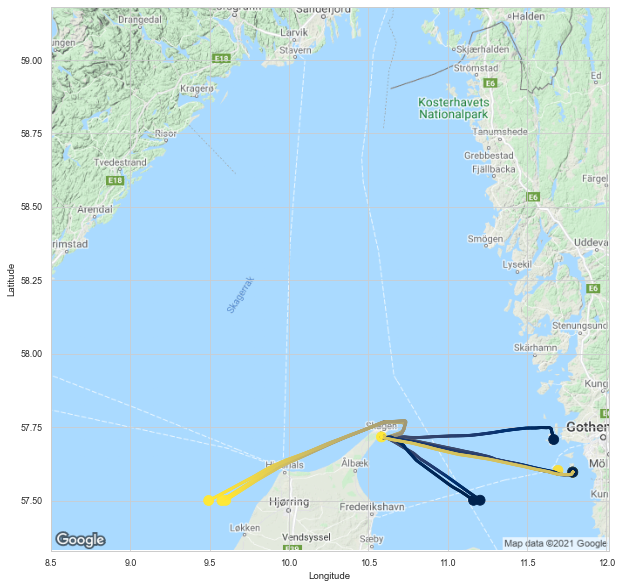

In [9]:
# Stop plotting and saving after each trajectory
visualise_trajectories.save_figures = False
visualise_trajectories.plot_figures = False
ax = visualise_trajectories.visualise_static_map(img)

# Take a look at some indicies for the same MMSI (211755650)
trajectories = []
for idx in data_info["indicies"][26:31]:
    df = get_track_by_index(data_file, idx)
    trajectories.append([df["mmsi"][0], df["track_length"][0], df["timestamp"][0], df["timestamp"].iloc[-1]])
    df_lon_lat =  get_track_by_index(data_file, idx, keep_cols=["lon", "lat"], col_names=["Longitude", "Latitude"])    
    visualise_trajectories.plot_single_track(df_lon_lat, ax, use_cmap=True)

# Plot the last trajectory and save the results
visualise_trajectories.save_figures = True
visualise_trajectories.plot_figures = True
df = get_track_by_index(data_file, data_info["indicies"][31])
trajectories.append([df["mmsi"][0],  df["track_length"][0], df["timestamp"][0], df["timestamp"].iloc[-1]])
df_lon_lat =  get_track_by_index(data_file, data_info["indicies"][31], keep_cols=["lon", "lat"],
                                 col_names=["Longitude", "Latitude"])    
visualise_trajectories.plot_single_track(df_lon_lat, ax, use_cmap=True)

In [10]:
df = pd.DataFrame(trajectories, columns=["MMSI", "TrackLength" , "DateTimeStart", "DateTimeEnd"])
df = df.sort_values("DateTimeStart")
df["NextDateTimeStart"] = df["DateTimeStart"].shift(-1)
df

,MMSI,TrackLength,DateTimeStart,DateTimeEnd,NextDateTimeStart
0,211755650,442,1970-04-28 22:27:48,1970-04-29 05:48:48,1970-09-12 00:26:23
1,211755650,29,1970-09-12 00:26:23,1970-09-12 00:54:23,1970-09-12 01:35:46
2,211755650,982,1970-09-12 01:35:46,1970-09-12 17:56:46,1970-09-23 18:44:24
3,211755650,604,1970-09-23 18:44:24,1970-09-24 04:47:24,1970-10-18 09:17:31
4,211755650,2026,1970-10-18 09:17:31,1970-10-19 19:02:31,1970-10-20 02:00:00
5,211755650,13424,1970-10-20 02:00:00,1970-10-29 09:43:00,NaT


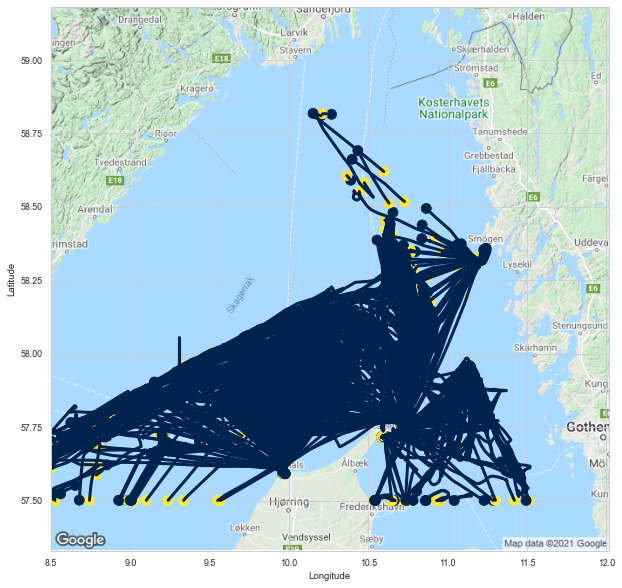

In [11]:
# Stop plotting and saving after each trajectory
visualise_trajectories.save_figures = False
visualise_trajectories.plot_figures = False
ax = visualise_trajectories.visualise_static_map(img)

trajectories = []
for idx in data_info["indicies"][1000:1199]:
    df = get_track_by_index(data_file, idx)
    trajectories.append([df["mmsi"][0], df["track_length"][0], df["timestamp"][0], df["timestamp"].iloc[-1]])
    df_lon_lat =  get_track_by_index(data_file, idx, keep_cols=["lon", "lat"], col_names=["Longitude", "Latitude"])    
    visualise_trajectories.plot_single_track(df_lon_lat, ax)
    
# Plot the last trajectory and save the results
visualise_trajectories.save_figures = True
visualise_trajectories.plot_figures = True
df = get_track_by_index(data_file, data_info["indicies"][1199])
trajectories.append([df["mmsi"][0], df["track_length"][0], df["timestamp"][0], df["timestamp"].iloc[-1]])
df_lon_lat =  get_track_by_index(data_file, data_info["indicies"][1199], keep_cols=["lon", "lat"],
                                 col_names=["Longitude", "Latitude"])    
visualise_trajectories.plot_single_track(df_lon_lat, ax)

In [12]:
df = pd.DataFrame(trajectories, columns=["MMSI", "TrackLength" , "DateTimeStart", "DateTimeEnd"])
df = df.sort_values("DateTimeStart")
df["NextDateTimeStart"] = df["DateTimeStart"].shift(-1)
df

,MMSI,TrackLength,DateTimeStart,DateTimeEnd,NextDateTimeStart
149,219796000,2232,1970-04-23 09:28:24,1970-04-24 22:39:24,1970-04-25 06:31:45
150,219796000,1639,1970-04-25 06:31:45,1970-04-26 09:49:45,1970-04-27 08:19:35
151,219796000,80,1970-04-27 08:19:35,1970-04-27 09:38:35,1970-04-27 20:59:35
152,219796000,4621,1970-04-27 20:59:35,1970-05-01 01:59:35,1970-06-21 08:22:45
153,219796000,14018,1970-06-21 08:22:45,1970-07-01 01:59:45,1970-07-06 10:55:55
...,...,...,...,...,...
98,219762000,91,1971-02-28 20:24:05,1971-02-28 21:54:05,1971-03-01 03:08:45
99,219762000,216,1971-03-01 03:08:45,1971-03-01 06:43:45,1971-03-01 09:12:06
100,219762000,26,1971-03-01 09:12:06,1971-03-01 09:37:06,1971-03-01 16:47:05
101,219762000,314,1971-03-01 16:47:05,1971-03-01 22:00:05,1971-03-01 23:54:45
